In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]
e = const.physical_constants['elementary charge'][0]

pathPre = '/mnt/md0/VSim/Convergence_Studies/Longitudinal_Convergence/'
simName = 'AccelGradient'

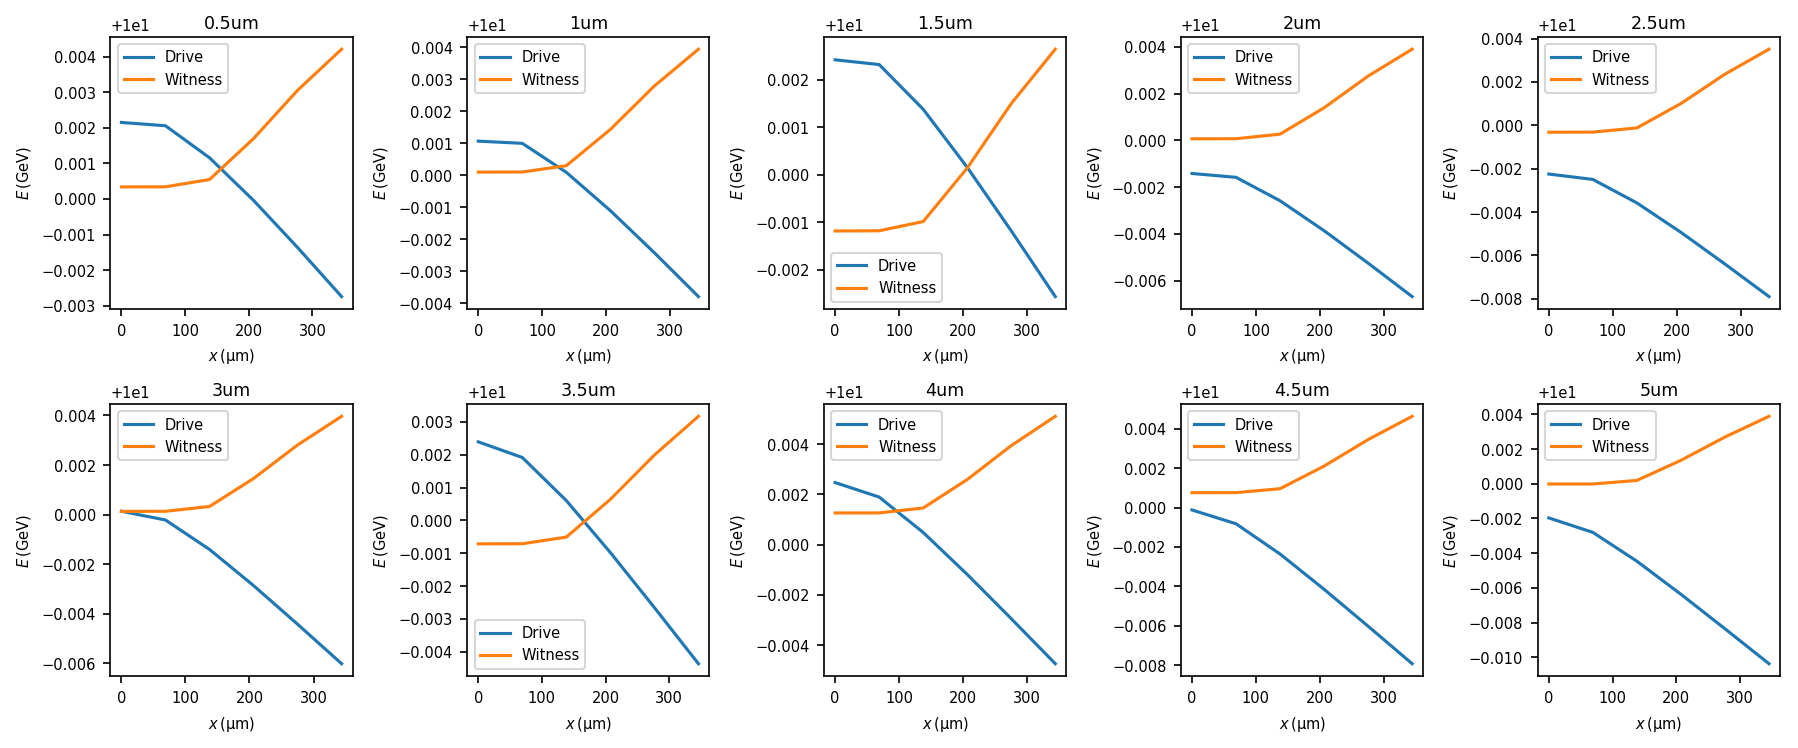

In [2]:
# Lets look at the different witness beams and see how their energy evolves
species2 = 'WitnessBeam'
species = 'ElectronBeam'
sims = [
    '0.5um',
    '1um',
    '1.5um',
    '2um',
    '2.5um',
    '3um',
    '3.5um',
    '4um',
    '4.5um',
    '5um'
]
N = len(sims)
energy = np.zeros(6, dtype='double')
energy2 = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
grad = np.zeros(N, dtype='double')
grad2 = np.zeros(N, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 5)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        energy[j] = analyze.get_energy(data, me*1e-3)
        energy2[j] = analyze.get_energy(data2, me*1e-3)
        x[j] = c*attrs['time']
    grad[i] = (energy[5]-energy[4]) / (x[5]-x[4])
    grad2[i] = (energy2[5]-energy2[4]) / (x[5]-x[4])
    if i < 5: row = 0
    else: row = 1
    plt.subplot(gs[row, i%5])
    plt.plot(x*1e6, energy)
    plt.plot(x*1e6, energy2)
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$E\,(\mathrm{GeV})$')
    plt.legend(['Drive', 'Witness'])
plt.tight_layout()
plt.show()

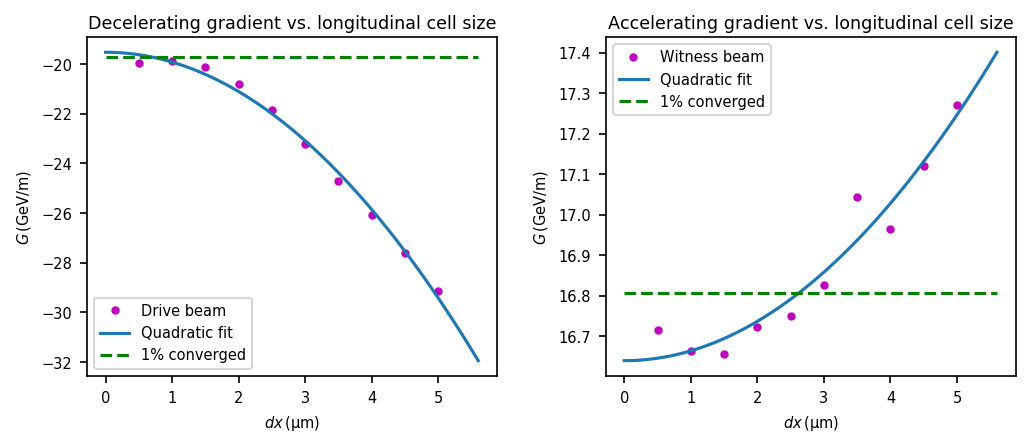

In [3]:
dx = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, dx, grad)
dxFit = np.linspace(0, 5.6, 100)
plt.figure(figsize=(7,3), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(dx, grad, 'm', marker='o', markersize=3, linestyle='none')
plt.plot(dxFit, func(dxFit, *popt))
plt.plot([0, 5.6], [popt[1]*1.01, popt[1]*1.01], 'g--')
plt.title('Decelerating gradient vs. longitudinal cell size')
plt.xlabel(r'$dx\,(\mathrm{\mu m})$')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend(['Drive beam', 'Quadratic fit', '1% converged'])

plt.subplot(gs[0, 1])
popt, pcov = curve_fit(func, dx, grad2)
plt.plot(dx, grad2, 'm', marker='o', markersize=3, linestyle='none')
plt.plot(dxFit, func(dxFit, *popt))
plt.plot([0, 5.6], [popt[1]*1.01, popt[1]*1.01], 'g--')
plt.title('Accelerating gradient vs. longitudinal cell size')
plt.xlabel(r'$dx\,(\mathrm{\mu m})$')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend(['Witness beam', 'Quadratic fit', '1% converged'])
plt.tight_layout()
plt.show()

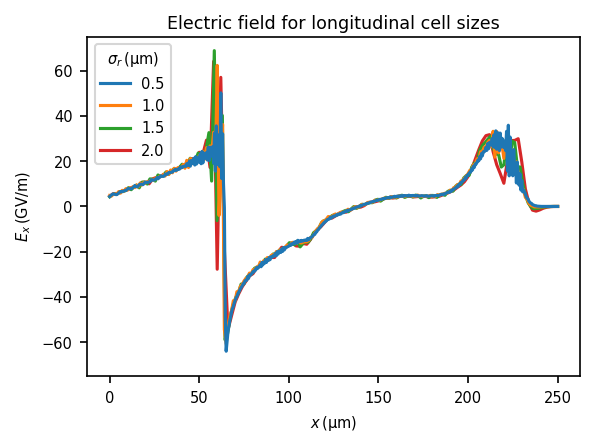

In [4]:
# Lets look at the accelerating field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    x = np.linspace(0, 250, Nx)
    plt.plot(x, Efield[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9, zorder=10-i)
plt.title('Electric field for longitudinal cell sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')
plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

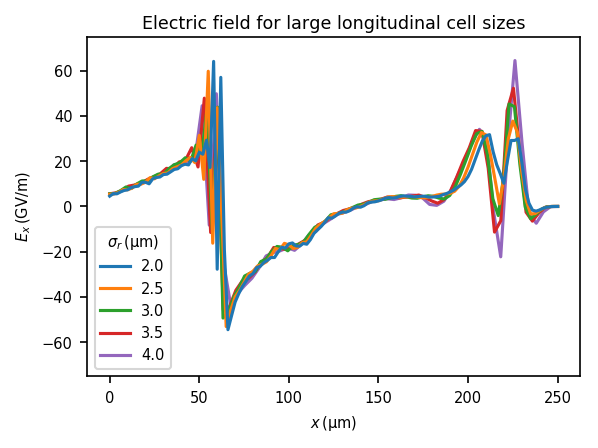

In [5]:
# Lets look at the accelerating field
plt.figure(figsize=(4,3), dpi=150)
for i in range(3, 8):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    x = np.linspace(0, 250, Nx)
    plt.plot(x, Efield[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9, zorder=10-i)
plt.title('Electric field for large longitudinal cell sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['2.0', '2.5', '3.0', '3.5', '4.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')
plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

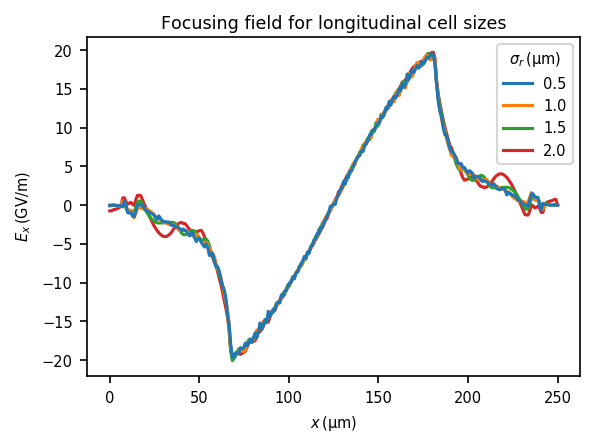

In [6]:
# Now lets look at the transverse field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    y = np.linspace(0, 250, Ny)
    plt.plot(y, Efield[5][int(2*Nx/3), :, int((Nz+1)/2), 1]/1e9, zorder=10-i)
plt.title('Focusing field for longitudinal cell sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')
#plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

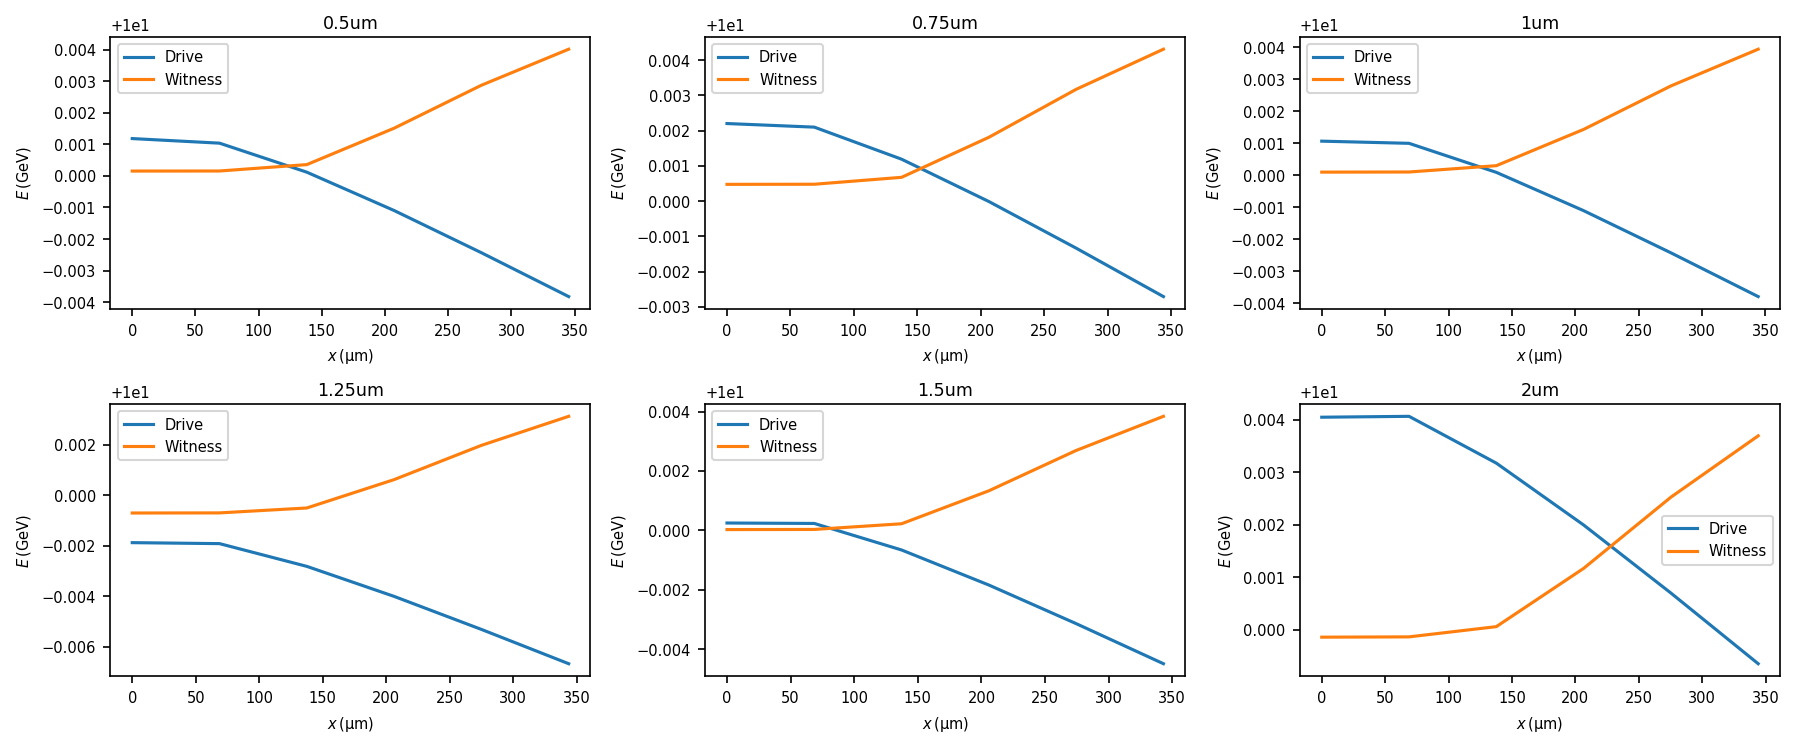

In [7]:
pathPre = '/mnt/md0/VSim/Convergence_Studies/Transverse_Convergence/'
# Lets look at the different witness beams and see how their energy evolves
species2 = 'WitnessBeam'
species = 'ElectronBeam'
sims = [
    '0.5um',
    '0.75um',
    '1um',
    '1.25um',
    '1.5um',
    '2um'
]
N = len(sims)
energy = np.zeros(6, dtype='double')
energy2 = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
grad = np.zeros(N, dtype='double')
grad2 = np.zeros(N, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 3)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        energy[j] = analyze.get_energy(data, me*1e-3)
        energy2[j] = analyze.get_energy(data2, me*1e-3)
        x[j] = c*attrs['time']
    grad[i] = (energy[5]-energy[4]) / (x[5]-x[4])
    grad2[i] = (energy2[5]-energy2[4]) / (x[5]-x[4])
    if i < 3: row = 0
    else: row = 1
    plt.subplot(gs[row, i%3])
    plt.plot(x*1e6, energy)
    plt.plot(x*1e6, energy2)
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$E\,(\mathrm{GeV})$')
    plt.legend(['Drive', 'Witness'])
plt.tight_layout()
plt.show()

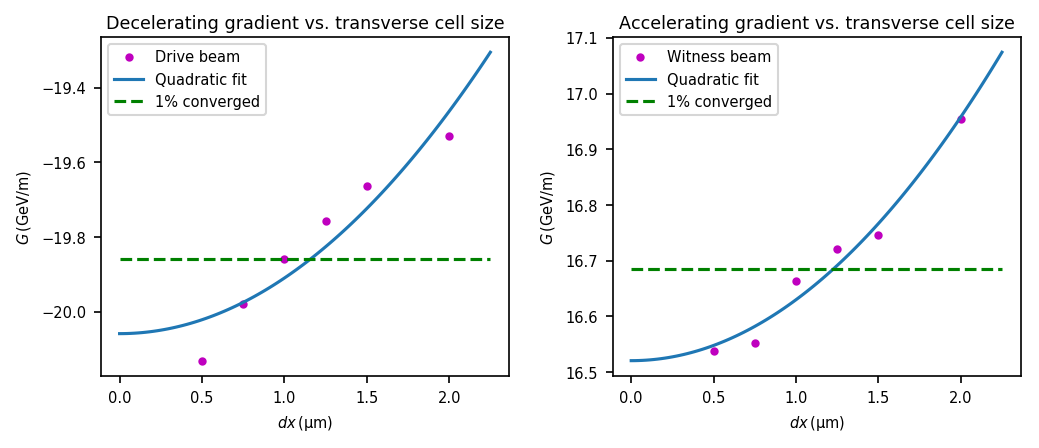

In [8]:
dx = np.array([0.5, 0.75, 1, 1.25, 1.5, 2])
def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, dx, grad)
dxFit = np.linspace(0, 2.25, 100)
plt.figure(figsize=(7,3), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(dx, grad, 'm', marker='o', markersize=3, linestyle='none')
plt.plot(dxFit, func(dxFit, *popt))
plt.plot([0, 2.25], [popt[1]*0.99, popt[1]*0.99], 'g--')
plt.title('Decelerating gradient vs. transverse cell size')
plt.xlabel(r'$dx\,(\mathrm{\mu m})$')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend(['Drive beam', 'Quadratic fit', '1% converged'])

plt.subplot(gs[0, 1])
popt, pcov = curve_fit(func, dx, grad2)
plt.plot(dx, grad2, 'm', marker='o', markersize=3, linestyle='none')
plt.plot(dxFit, func(dxFit, *popt))
plt.plot([0, 2.25], [popt[1]*1.01, popt[1]*1.01], 'g--')
plt.title('Accelerating gradient vs. transverse cell size')
plt.xlabel(r'$dx\,(\mathrm{\mu m})$')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend(['Witness beam', 'Quadratic fit', '1% converged'])
plt.tight_layout()
plt.show()

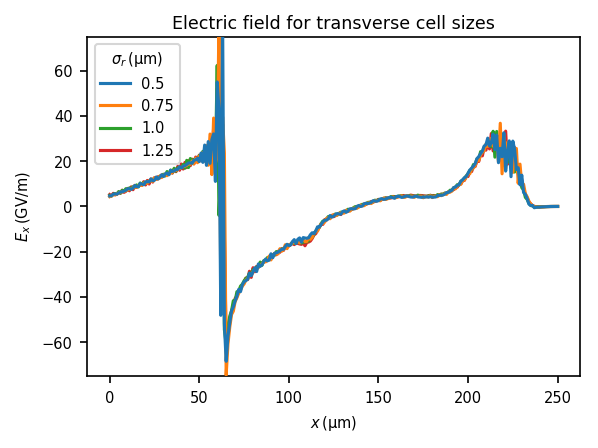

In [9]:
# Lets look at the accelerating field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    x = np.linspace(0, 250, Nx)
    plt.plot(x, Efield[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9, zorder=10-i)
plt.title('Electric field for transverse cell sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '0.75', '1.0', '1.25', '1.5', '2.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')
plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

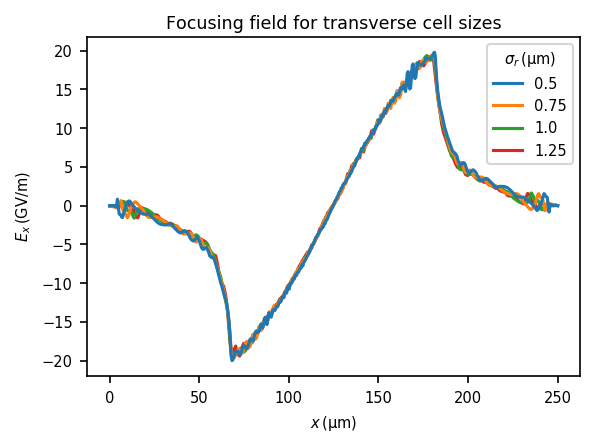

In [10]:
# Now lets look at the transverse field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    y = np.linspace(0, 250, Ny)
    plt.plot(y, Efield[5][int(2*Nx/3), :, int((Nz+1)/2), 1]/1e9, zorder=10-i)
plt.title('Focusing field for transverse cell sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '0.75', '1.0', '1.25', '1.5', '2.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')
#plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

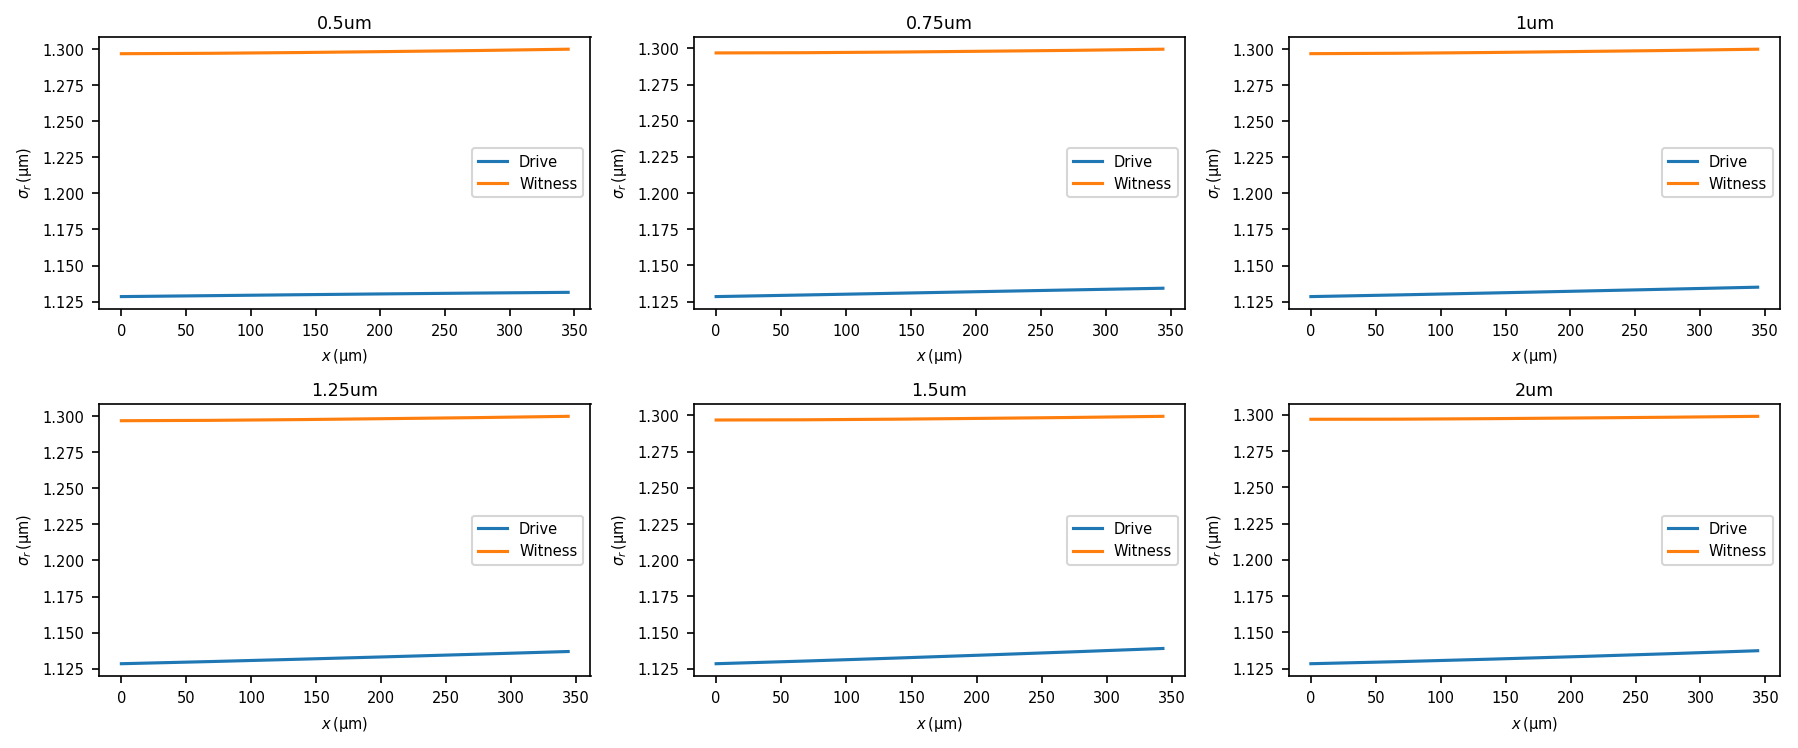

In [11]:
# Lets look at the witness beam and see how sigmar evolves
species2 = 'WitnessBeam'
species = 'ElectronBeam'
sims = [
    '0.5um',
    '0.75um',
    '1um',
    '1.25um',
    '1.5um',
    '2um'
]
N = len(sims)
sigmar = np.zeros((N, 6), dtype='double')
sigmar2 = np.zeros((N, 6), dtype='double')
x = np.zeros(6, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 3)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        sigmar[i, j] = analyze.get_sigmar(data)
        sigmar2[i, j] = analyze.get_sigmar(data2)
        x[j] = c*attrs['time']
    if i < 3: row = 0
    else: row = 1
    plt.subplot(gs[row, i%3])
    plt.plot(x*1e6, sigmar[i, :]*1e6)
    plt.plot(x*1e6, sigmar2[i, :]*1e6)
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$\sigma_r\,(\mathrm{\mu m})$')
    plt.legend(['Drive', 'Witness'])
plt.tight_layout()
plt.show()

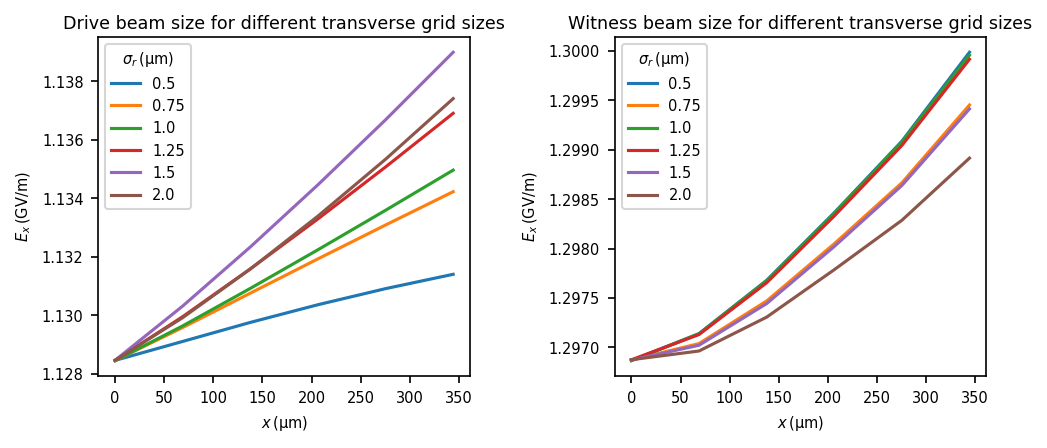

In [12]:
# Now lets look at the transverse field
plt.figure(figsize=(7,3), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
for i in range(6):
    plt.plot(x*1e6, sigmar[i, :]*1e6)
plt.title('Drive beam size for different transverse grid sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '0.75', '1.0', '1.25', '1.5', '2.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')

plt.subplot(gs[0, 1])
for i in range(6):
    plt.plot(x*1e6, sigmar2[i, :]*1e6)
plt.title('Witness beam size for different transverse grid sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '0.75', '1.0', '1.25', '1.5', '2.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')

plt.tight_layout()
plt.show()

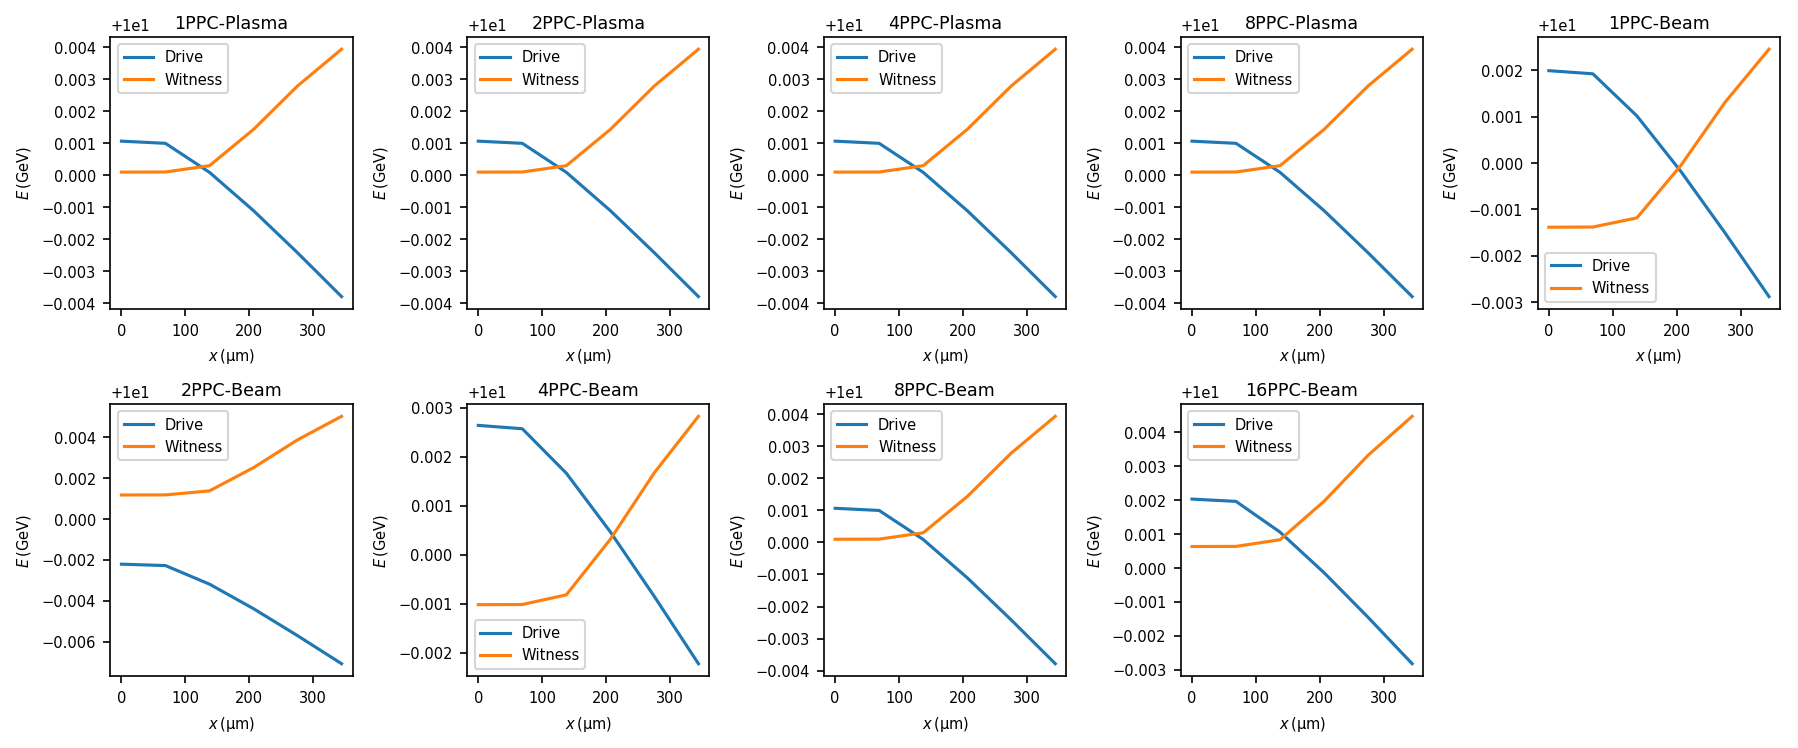

In [13]:
pathPre = '/mnt/md0/VSim/Convergence_Studies/PPC_Convergence/'
# Lets look at the different witness beams and see how their energy evolves
species2 = 'WitnessBeam'
species = 'ElectronBeam'
sims = [
    '1PPC-Plasma',
    '2PPC-Plasma',
    '4PPC-Plasma',
    '8PPC-Plasma',
    '1PPC-Beam',
    '2PPC-Beam',
    '4PPC-Beam',
    '8PPC-Beam',
    '16PPC-Beam'
]
N = len(sims)
energy = np.zeros(6, dtype='double')
energy2 = np.zeros(6, dtype='double')
x = np.zeros(6, dtype='double')
grad = np.zeros(N, dtype='double')
grad2 = np.zeros(N, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 5)
for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(6):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        energy[j] = analyze.get_energy(data, me*1e-3)
        energy2[j] = analyze.get_energy(data2, me*1e-3)
        x[j] = c*attrs['time']
    grad[i] = (energy[5]-energy[4]) / (x[5]-x[4])
    grad2[i] = (energy2[5]-energy2[4]) / (x[5]-x[4])
    if i < 5: row = 0
    else: row = 1
    plt.subplot(gs[row, i%5])
    plt.plot(x*1e6, energy)
    plt.plot(x*1e6, energy2)
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$E\,(\mathrm{GeV})$')
    plt.legend(['Drive', 'Witness'])
plt.tight_layout()
plt.show()

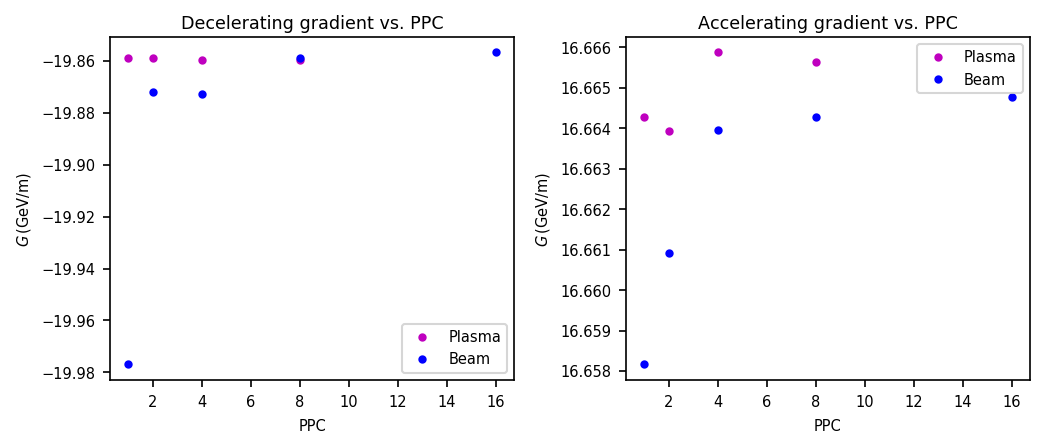

In [14]:
ppcp = np.array([1, 2, 4, 8])
ppcb = np.array([1, 2, 4, 8, 16])
#def func(x, a, b):
#    return a*x**2 + b
#popt, pcov = curve_fit(func, dx, grad)
#dxFit = np.linspace(0, 2.25, 100)
plt.figure(figsize=(7,3), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(ppcp, grad[:4], 'm', marker='o', markersize=3, linestyle='none')
plt.plot(ppcb, grad[4:], 'b', marker='o', markersize=3, linestyle='none')
#plt.plot(dxFit, func(dxFit, *popt))
#plt.plot([0, 2.25], [popt[1]*0.99, popt[1]*0.99], 'g--')
plt.title('Decelerating gradient vs. PPC')
plt.xlabel(r'PPC')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend(['Plasma', 'Beam'])

plt.subplot(gs[0, 1])
#popt, pcov = curve_fit(func, dx, grad2)
plt.plot(ppcp, grad2[:4], 'm', marker='o', markersize=3, linestyle='none')
plt.plot(ppcb, grad2[4:], 'b', marker='o', markersize=3, linestyle='none')
#plt.plot(dxFit, func(dxFit, *popt))
#plt.plot([0, 2.25], [popt[1]*1.01, popt[1]*1.01], 'g--')
plt.title('Accelerating gradient vs. PPC')
plt.xlabel(r'PPC')
plt.ylabel(r'$G\,(\mathrm{GeV/m})$')
plt.legend(['Plasma', 'Beam'])
plt.tight_layout()
plt.show()

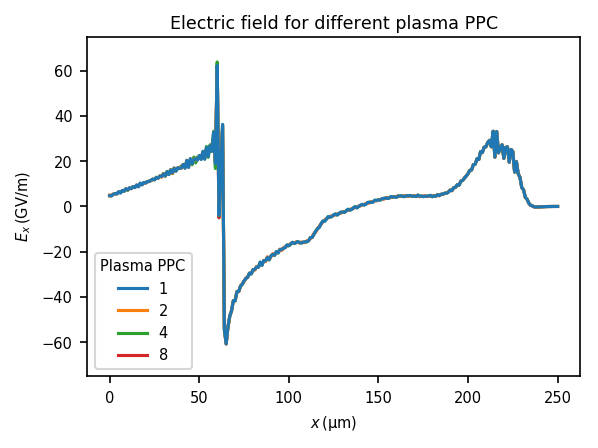

In [15]:
# Lets look at the accelerating field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    x = np.linspace(0, 250, Nx)
    plt.plot(x, Efield[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9, zorder=10-i)
plt.title('Electric field for different plasma PPC')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['1', '2', '4', '8'], title=r'Plasma PPC')
plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

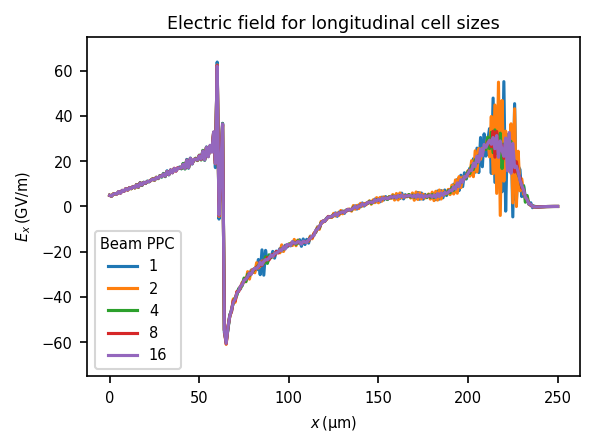

In [16]:
# Lets look at the accelerating field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4, 9):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    x = np.linspace(0, 250, Nx)
    plt.plot(x, Efield[5][:, int((Ny+1)/2), int((Nz+1)/2), 0]/1e9)#, zorder=10-i)
plt.title('Electric field for longitudinal cell sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['1', '2', '4', '8', '16'], title=r'Beam PPC')
plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

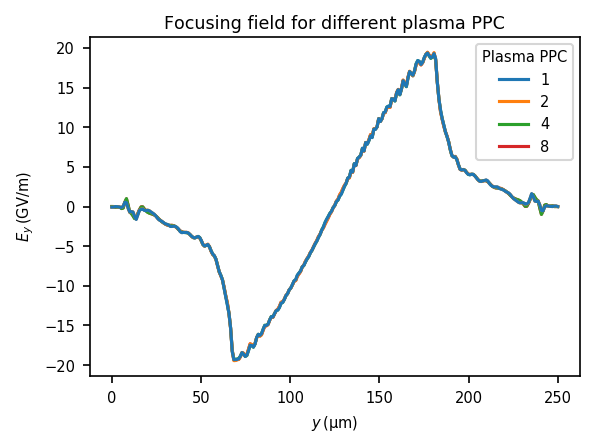

In [17]:
# Now lets look at the transverse field
plt.figure(figsize=(4,3), dpi=150)
for i in range(4):
    path = pathPre + sims[i] +'/'
    Efield, Eattrs = load.load_field(path, simName, 'edgeE')
    Nx, Ny, Nz = analyze.get_shape(Efield[5])
    y = np.linspace(0, 250, Ny)
    plt.plot(y, Efield[5][int(2*Nx/3), :, int((Nz+1)/2), 1]/1e9, zorder=10-i)
plt.title('Focusing field for different plasma PPC')
plt.xlabel(r'$y\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_y\,(\mathrm{GV/m})$')
plt.legend(['1', '2', '4', '8'], title=r'Plasma PPC')
#plt.ylim([-75, 75])
plt.tight_layout()
plt.show()

[  8.80418389e-07   3.07312610e+02  -3.43268414e-02]
[  8.80709048e-07   2.94715696e+02  -4.28395369e-02]
[  8.81543010e-07   2.85081225e+02  -6.10242595e-02]
[  8.81561038e-07   2.75820260e+02  -6.13455205e-02]
[  8.81887164e-07   2.58428672e+02  -6.73249803e-02]
[  8.82155925e-07   2.49314934e+02  -7.18049000e-02]
[  8.81774614e-07   2.41631049e+02  -6.52583512e-02]


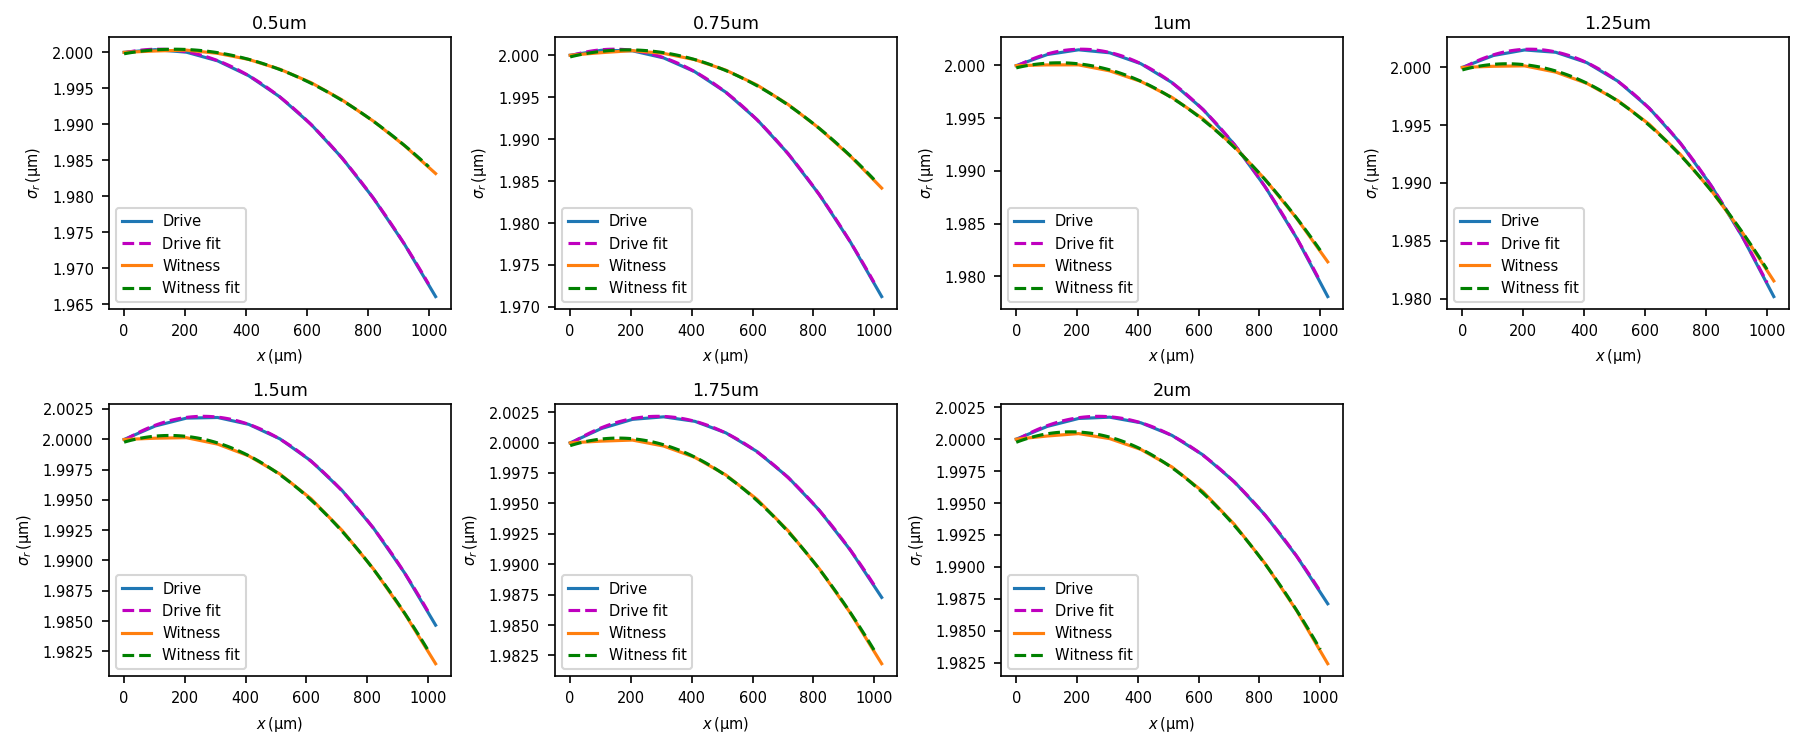

In [18]:
# Lets look at the witness beam and see how sigmar evolves
pathPre = '/mnt/md0/VSim/Convergence_Studies/Transverse_Convergence_Mismatch/'
species2 = 'WitnessBeam'
species = 'ElectronBeam'
sims = [
    '0.5um',
    '0.75um',
    '1um',
    '1.25um',
    '1.5um',
    '1.75um',
    '2um'
]
N = len(sims)
sigmar = np.zeros((N, 11), dtype='double')
sigmar2 = np.zeros((N, 11), dtype='double')
x = np.zeros(11, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 4)
xplot = np.linspace(0, 1e-3, 100)
omega = np.zeros(N, dtype='double')
omega2 = np.zeros(N, dtype='double')
def cos(x, A, w, p):
    return A*np.cos(w*x + p)+1.12e-6
def cos2(x, A, w, p):
    return A*np.cos(w*x + p)+1.29e-6

for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(11):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        sigmar[i, j] = analyze.get_sigmar(data)
        sigmar2[i, j] = analyze.get_sigmar(data2)
        x[j] = c*attrs['time']
    popt, pcov = curve_fit(cos, x, sigmar[i, :], p0=[8.8e-7, 2.0e2, 0.001], maxfev=10000)
    popt2, pcov = curve_fit(cos2, x, sigmar2[i, :], p0=[8.8e-7, 2.0e2, 0.001], maxfev=10000)
    print(popt)
    omega[i] = popt[1]
    omega2[i] = popt2[1]
    if i < 4: row = 0
    else: row = 1
    plt.subplot(gs[row, i%4])
    plt.plot(x*1e6, sigmar[i, :]*1e6)
    plt.plot(xplot*1e6, cos(xplot, *popt)*1e6, 'm--')
    plt.plot(x*1e6, sigmar2[i, :]*1e6)
    plt.plot(xplot*1e6, cos2(xplot, *popt2)*1e6, 'g--')
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$\sigma_r\,(\mathrm{\mu m})$')
    plt.legend(['Drive', 'Drive fit', 'Witness', 'Witness fit'])
plt.tight_layout()
plt.show()

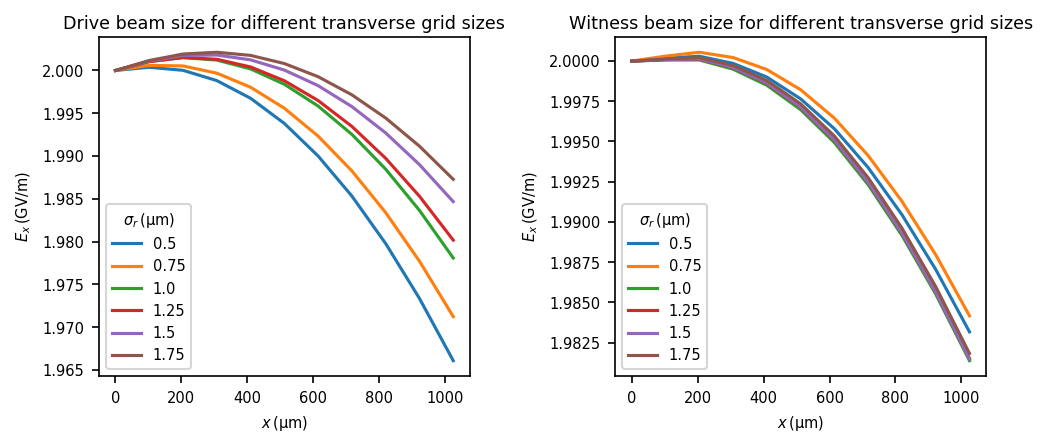

In [19]:
# Now lets look at the transverse field
plt.figure(figsize=(7,3), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
for i in range(6):
    plt.plot(x*1e6, sigmar[i, :]*1e6)
plt.title('Drive beam size for different transverse grid sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '0.75', '1.0', '1.25', '1.5', '1.75', '2.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')

plt.subplot(gs[0, 1])
for i in range(6):
    plt.plot(x*1e6, sigmar2[i, :]*1e6)
plt.title('Witness beam size for different transverse grid sizes')
plt.xlabel(r'$x\,(\mathrm{\mu m})$')
plt.ylabel(r'$E_x\,(\mathrm{GV/m})$')
plt.legend(['0.5', '0.75', '1.0', '1.25', '1.5', '1.75', '2.0'], title=r'$\sigma_r\,\mathrm{(\mu m)}$')

plt.tight_layout()
plt.show()

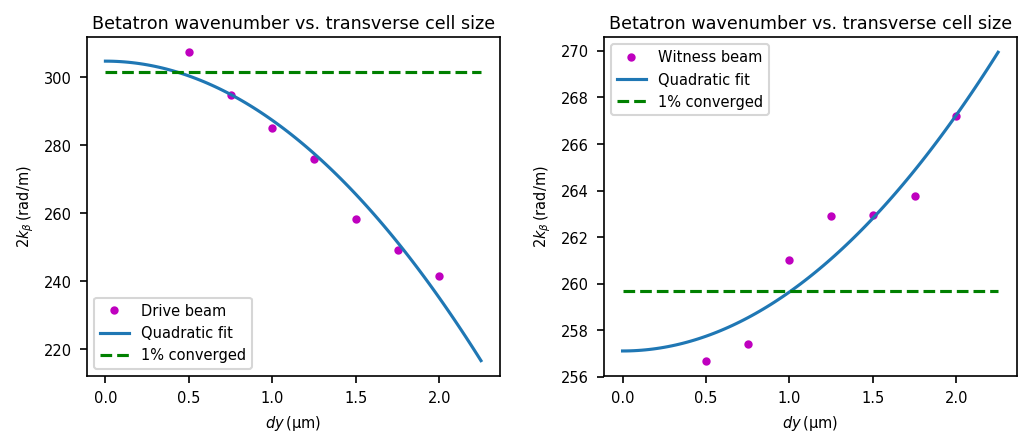

In [20]:
dx = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0])
def func(x, a, b):
    return a*x**2 + b
popt, pcov = curve_fit(func, dx, omega)
dxFit = np.linspace(0, 2.25, 100)
plt.figure(figsize=(7,3), dpi=150)
gs = gridspec.GridSpec(1, 2)
plt.subplot(gs[0, 0])
plt.plot(dx, omega, 'm', marker='o', markersize=3, linestyle='none')
plt.plot(dxFit, func(dxFit, *popt))
plt.plot([0, 2.25], [popt[1]*0.99, popt[1]*0.99], 'g--')
plt.title('Betatron wavenumber vs. transverse cell size')
plt.xlabel(r'$dy\,(\mathrm{\mu m})$')
plt.ylabel(r'$2k_\beta\,(\mathrm{rad/m})$')
plt.legend(['Drive beam', 'Quadratic fit', '1% converged'])

plt.subplot(gs[0, 1])
popt, pcov = curve_fit(func, dx, omega2)
plt.plot(dx, omega2, 'm', marker='o', markersize=3, linestyle='none')
plt.plot(dxFit, func(dxFit, *popt))
plt.plot([0, 2.25], [popt[1]*1.01, popt[1]*1.01], 'g--')
plt.title('Betatron wavenumber vs. transverse cell size')
plt.xlabel(r'$dy\,(\mathrm{\mu m})$')
plt.ylabel(r'$2k_\beta\,(\mathrm{rad/m})$')
plt.legend(['Witness beam', 'Quadratic fit', '1% converged'])
plt.tight_layout()
plt.show()

[  7.31766330e-07   6.14178521e+02  -8.52515844e-01]
[ -1.36327360e-06   5.98653217e+02  -2.52967708e+00]


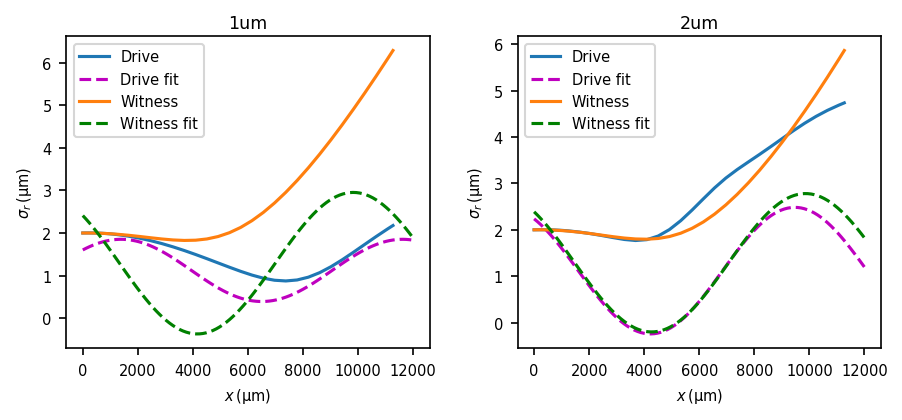

In [29]:
# Lets look at the witness beam and see how sigmar evolves
pathPre = '/mnt/md0/VSim/Convergence_Studies/Transverse_Convergence_Mismatch/'
species2 = 'WitnessBeam'
species = 'ElectronBeam'
sims = [
#    '0.5um',
#    '0.75um',
    '1um',
#    '1.25um',
#    '1.5um',
#    '1.75um',
    '2um'
]
N = len(sims)
sigmar = np.zeros((N, 37), dtype='double')
sigmar2 = np.zeros((N, 37), dtype='double')
x = np.zeros(37, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 4)
xplot = np.linspace(0, 12e-3, 100)
omega = np.zeros(N, dtype='double')
omega2 = np.zeros(N, dtype='double')
def cos(x, A, w, p):
    return A*np.cos(w*x + p)+1.12e-6
def cos2(x, A, w, p):
    return A*np.cos(w*x + p)+1.29e-6

for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(37):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        sigmar[i, j] = analyze.get_sigmar(data)
        sigmar2[i, j] = analyze.get_sigmar(data2)
        x[j] = c*attrs['time']
    popt, pcov = curve_fit(cos, x, sigmar[i, :], p0=[8.8e-7, 3.0e2, 0.001], maxfev=10000)
    popt2, pcov = curve_fit(cos2, x, sigmar2[i, :], p0=[8.8e-7, 3.0e2, 0.001], maxfev=10000)
    print(popt)
    omega[i] = popt[1]
    omega2[i] = popt2[1]
    if i < 4: row = 0
    else: row = 1
    plt.subplot(gs[row, i%4])
    plt.plot(x*1e6, sigmar[i, :]*1e6)
    plt.plot(xplot*1e6, cos(xplot, *popt)*1e6, 'm--')
    plt.plot(x*1e6, sigmar2[i, :]*1e6)
    plt.plot(xplot*1e6, cos2(xplot, *popt2)*1e6, 'g--')
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$\sigma_r\,(\mathrm{\mu m})$')
    plt.legend(['Drive', 'Drive fit', 'Witness', 'Witness fit'])
plt.tight_layout()
plt.show()

[  2.91880832e-06   2.80530962e+02   8.33210137e+00   4.03600429e-06]
[  1.45553564e-06   2.64423324e+02   1.73721442e+00   2.67256772e-06]


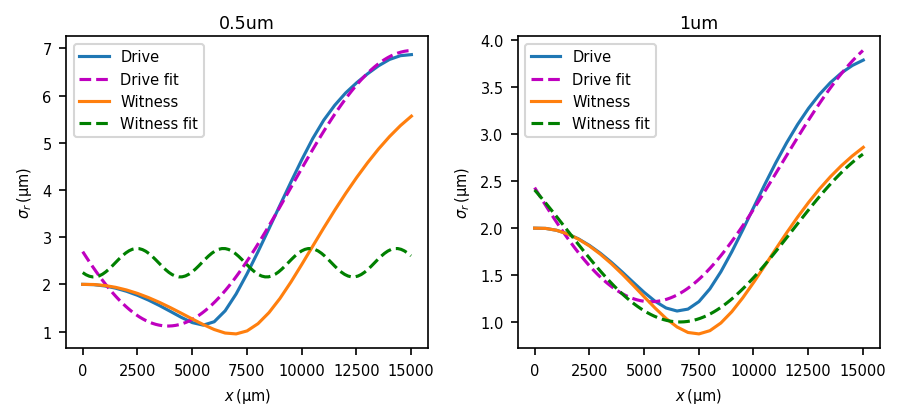

In [33]:
# Lets look at the witness beam and see how sigmar evolves
pathPre = '/mnt/md0/VSim/Convergence_Studies/Transverse_Convergence_Narrow_Domain/'
species2 = 'WitnessBeam'
species = 'ElectronBeam'
dumps = 30
dumps += 1
sims = [
    '0.5um',
#    '0.75um',
    '1um',
#    '1.25um',
#    '1.5um',
#    '1.75um',
#    '2um'
]
N = len(sims)
sigmar = np.zeros((N, dumps), dtype='double')
sigmar2 = np.zeros((N, dumps), dtype='double')
x = np.zeros(dumps, dtype='double')
plt.figure(figsize=(12,5), dpi=150)
gs = gridspec.GridSpec(2, 4)
xplot = np.linspace(0, 15e-3, 100)
omega = np.zeros(N, dtype='double')
omega2 = np.zeros(N, dtype='double')
def cos(x, A, w, p, o):
    return A*np.cos(w*x + p)+o
def cos2(x, A, w, p, o):
    return A*np.cos(w*x + p)+o

for i in range(N):
    path = pathPre + sims[i] +'/'
    for j in range(dumps):
        file = plot.get_filename(path, simName, species, j)
        file2 = plot.get_filename(path, simName, species2, j)
        data = load.get_species_data(file, species)
        data2 = load.get_species_data(file2, species2)
        attrs = load.get_species_attrs(file, species)
        sigmar[i, j] = analyze.get_sigmar(data)
        sigmar2[i, j] = analyze.get_sigmar(data2)
        x[j] = c*attrs['time']
    popt, pcov = curve_fit(cos, x, sigmar[i, :], p0=[8.8e-7, 3.0e2, 0.001, 1.12e-6], maxfev=10000)
    popt2, pcov = curve_fit(cos2, x, sigmar2[i, :], p0=[8.8e-7, 3.0e2, 0.001, 12.1e-6], maxfev=10000)
    print(popt)
    omega[i] = popt[1]
    omega2[i] = popt2[1]
    if i < 4: row = 0
    else: row = 1
    plt.subplot(gs[row, i%4])
    plt.plot(x*1e6, sigmar[i, :]*1e6)
    plt.plot(xplot*1e6, cos(xplot, *popt)*1e6, 'm--')
    plt.plot(x*1e6, sigmar2[i, :]*1e6)
    plt.plot(xplot*1e6, cos2(xplot, *popt2)*1e6, 'g--')
    plt.title(sims[i])
    plt.xlabel(r'$x\,(\mathrm{\mu m})$')
    plt.ylabel(r'$\sigma_r\,(\mathrm{\mu m})$')
    plt.legend(['Drive', 'Drive fit', 'Witness', 'Witness fit'])
plt.tight_layout()
plt.show()